## Plotting and Visualization

In [2]:
%matplotlib inline

`%matplotlib inline` is an **IPython magic command** that tells Jupyter:

**“Whenever I create a matplotlib plot, render it _right here in this notebook cell_ as a static image.”**

That’s it. It doesn’t summon dragons. It just forces plots to show up beneath the code that produced them.

If you want a bit more clarity without me putting on a whole lecture robe:

### What it actually does
* Hooks Matplotlib into the Jupyter kernel    
* Forces figures to be displayed **inline as PNGs**    
* Prevents the classic “I plotted something… but nothing showed up” moment
    

### Why it exists

Matplotlib wasn’t originally designed for notebooks. In old-school Python scripts you needed `plt.show()` to pop up a window. In notebooks, the magic makes the plot embed itself directly in the output area.

### Modern note (you’ll love this)

Jupyter **no longer requires you to type this**.  
Most popular environments configure inline plotting automatically.

But sure, you can still use it. Nostalgia is a powerful thing.

### Related variations

* `%matplotlib inline` — static images    
* `%matplotlib notebook` — interactive, zoomable plots (older Jupyter)    
* `%matplotlib widget` — modern interactive plots using Jupyter widgets

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
import sympy

let’s say that we would like to graph the y(x) = x3+5x2+10 function, together with its first- and second-order derivatives, over the range x ∈ [−5, 2]. To do this, we first create NumPy arrays for the x range and then compute the three functions we want to graph. When the data for the graph is prepared, we need to create Matplotlib Figure and Axes instances and then use the plot method of the Axes instance to plot the data. We can set basic graph properties such as x and y-axis labels using the set_xlabel and set_ylabel methods and generate a legend using the legend method

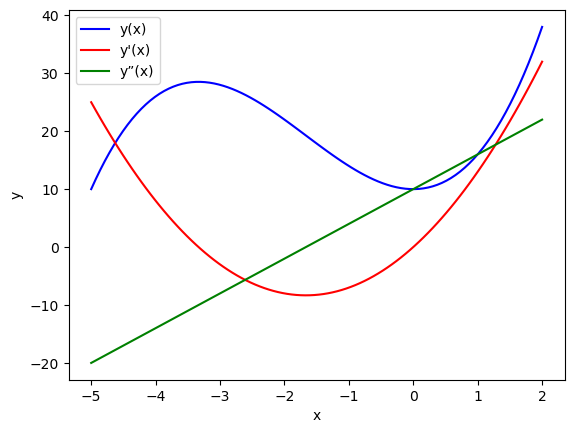

In [ ]:
x = np.linspace(-5, 2, 100)
y1 = x**3 + 5*x**2 + 10
y2 = 3*x**2 + 10*x
y3 = 6*x + 10

fig, ax = plt.subplots()
# Once the Axes instance is available, note that all the remaining steps involve the calling methods of this Axes instance

ax.plot(x, y1, color="blue", label="y(x)")
ax.plot(x, y2, color="red", label="y'(x)")
ax.plot(x, y3, color="green", label="y”(x)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()


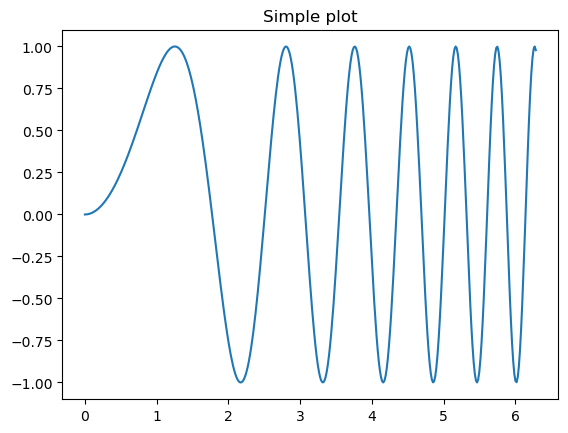

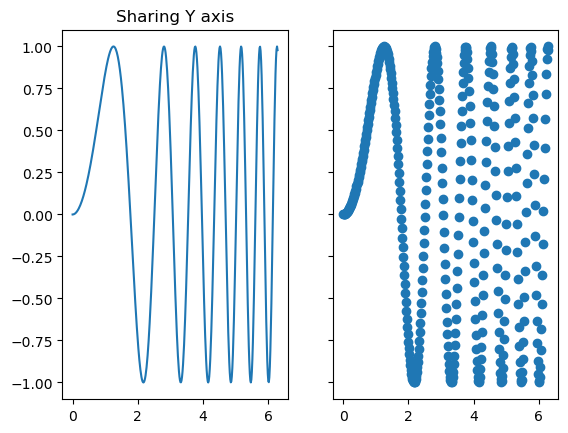

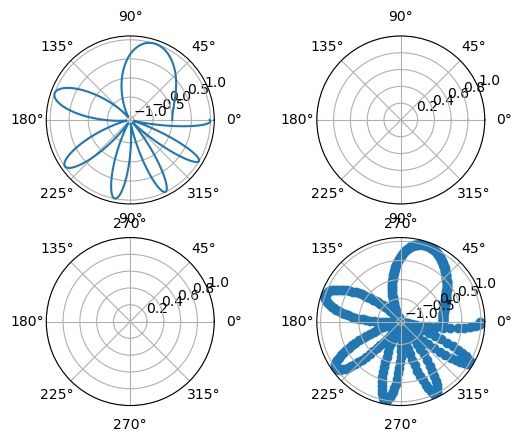

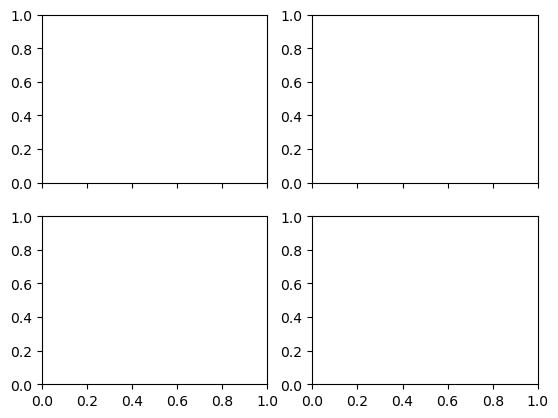

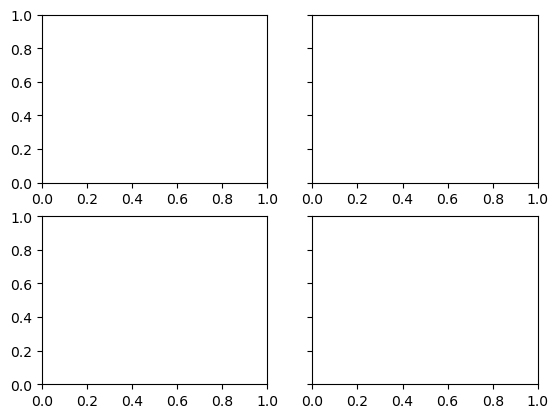

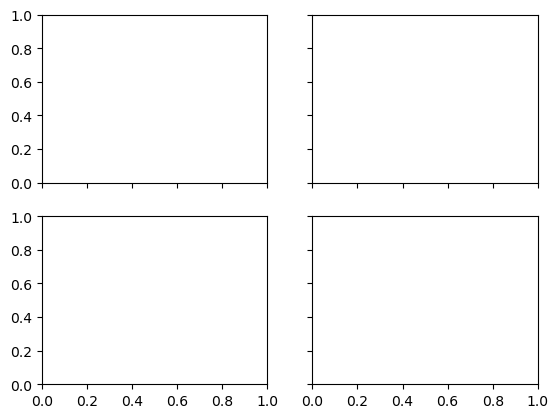

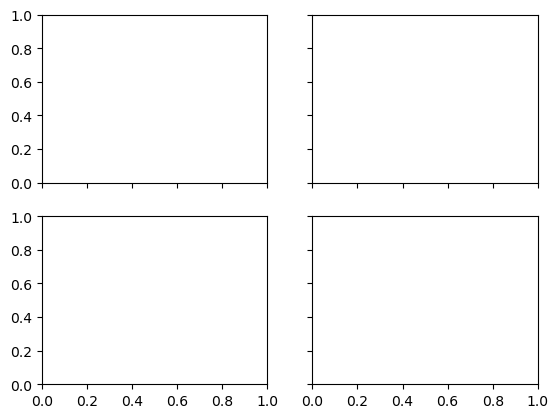

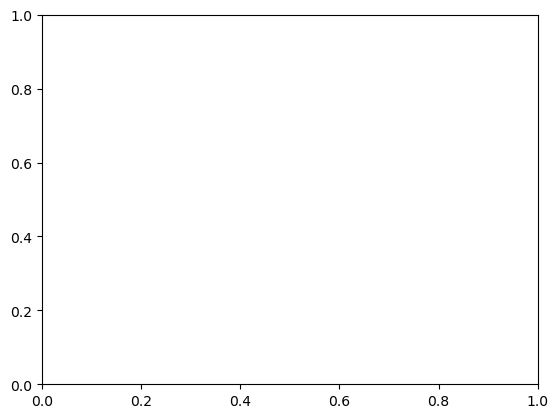

In [8]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Create four polar Axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)

***
### Interactive and Noninteractive Modes

Matplotlib provides backends for generating graphics in different formats (e.g., PNG, PDF, Postscript, and SVG) and for displaying graphics in a graphical user interface using a variety of different widget toolkits (e.g., Qt, GTK, wxWidgets, and Cocoa for macOS) that are suitable for different platforms.

The backend can be selected in that Matplotlib resource file2 or using the mpl.use function, which must be called right after importing matplotlib, before importing the matplotlib.pyplot module. For example, to select the Qt5Agg backend, we can use the following.

In [ ]:
import matplotlib as mpl
mpl.use('Qt5Agg')
import matplotlib.pyplot as plt

While the interactive graphical user interfaces have unique advantages, when working the Jupyter Notebook or the Qtconsole, it is often more convenient to display Matplotlib-produced graphics embedded directly in the notebook. This behavior is the default in the current version of Jupyter, but the “inline backend” can also be activated explicitly using the IPython command %matplotlib inline. This configures Matplotlib to use a noninteractive backend to generate graphics images, which are then displayed as static images in, for example, the Jupyter Notebook. The inline backend for Matplotlib can be fine-tuned using the IPython %config command. For example, we can select the output format for the generated graphics using the InlineBackend.figure_format option,3 which, for example, we can set to ‘svg’ to generate SVG graphics rather than PNG files.


In [10]:
# %matplotlib inline
%config InlineBackend.figure_format='svg'

***
### **Figure**

Figure object is used in Matplotlib to represent a graph. In addition to providing a canvas to place Axes instances on, the Figure object also provides methods for performing actions on figures

A `Figure` object can be created using the `plt.figure` function, which takes several optional keyword arguments for setting figure properties. Notably, it accepts the `figsize` keyword argument, which should be assigned to a tuple on the form `(width, height)`, specifying the width and height of the figure canvas in inches. It can also be useful to specify the color of the figure canvas by setting the `facecolor` keyword argument.

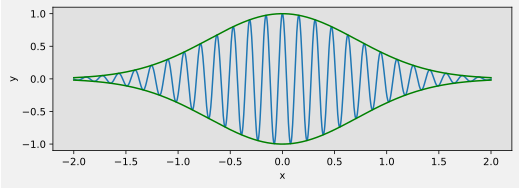

In [ ]:
fig = plt.figure(figsize=(8, 2.5), facecolor="#f1f1f1")

# axes coordinates as fractions of the canvas width and height
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes((left, bottom, width, height), facecolor="#e1e1e1")

x = np.linspace(-2, 2, 1000)
y1 = np.cos(40 * x)
y2 = np.exp(-x**2)

ax.plot(x, y1 * y2)
ax.plot(x, y2, 'g')
ax.plot(x, -y2, 'g')

ax.set_xlabel("x")
ax.set_ylabel("y")

fig.savefig("graph.png", dpi=100)

***
### Axes

Axes provides a coordinate system to plot data and mathematical functions. In addition, it contains the axis objects that determine where the axis labels and the axis ticks are placed. The functions for drawing different types of plots are also methods of this Axes class. 

 Matplotlib provides several Axes layout managers, creating and placing Axes instances within a figure canvas following different strategies.
 
 `fig, axes = plt.subplots(nrows=3, ncols=2)` 
 
* the `plt.subplots` function returns a `tuple (fig, axes)`, where fig is a Figure instance, and axes is a NumPy array of size (nrows, ncols), in which each element is an Axes instance that has been appropriately placed in the corresponding figure canvas.
 
* The `plt.subplots` function also takes two special keyword arguments `fig_kw` and `subplot_kw`, which are dictionaries with keyword arguments used when creating the Figure and Axes instances, respectively. This allows setting the properties of the Figure and Axes objects with `plt.subplots` similarly to when directly using `plt.figure` and the make_axes method.

***
### Plot Types

Matplotlib implements many types of plotting techniques as methods of the `Axes` object. For example, the previous examples used the `plot` method, which draws curves in the coordinate system provided by the `Axes` object. The following sections explore some of Matplotlib’s plotting functions in more depth by using these functions in example graphs.

All plotting functions in Matplotlib expect data as `NumPy arrays` as input, typically arrays with x and y coordinates as the first and second arguments. For details, see the docstrings for each method shown in Figure 4-6, using, for example, `help(plt.Axes.bar)`.

![Plot Types](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9798868804137/files/images/332789_3_En_4_Chapter/332789_3_En_4_Fig6_HTML.png)

***
### Line Properties

The most basic type of plot is the simple line plot. It may be used to depict the graph of a univariate function or to plot data as a function of a control variable. In line plots, we frequently need to configure the properties of the lines in the graph, for example, the line width, line color, and line style (solid, dashed, dotted, etc.). 

In Matplotlib we set these properties with `keyword` arguments to the plot methods, such as `plot`, `step`, and `bar`. A few of these graph types are shown in Figure 4-6. Many plot methods have specific arguments, but basic properties such as colors and line width are shared among most plotting methods. These properties and the corresponding keyword arguments are summarized in Table 4-1.

![line](line-properties.png)

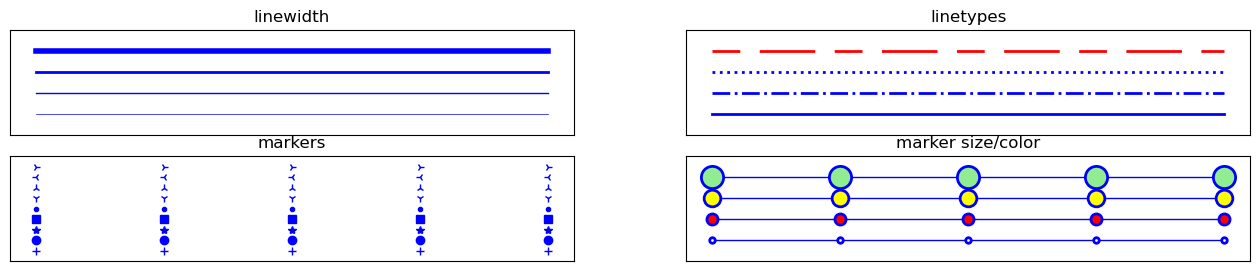

In [10]:
x = np.linspace(-5, 5, 5)
y = np.ones_like(x)

def axes_settings(fig, ax, title, ymax):
   ax.set_xticks([])
   ax.set_yticks([])
   ax.set_ylim(0, ymax+1)
   ax.set_title(title)

# fig, axes = plt.subplots(1, 4, figsize=(16,3))
   # or
fig, axes = plt.subplots(2, 2, figsize=(16,3))
axes = axes.flatten()  # make 1D array for easy iteration otherwise axes[0,0], axes[0,1], ... that would require changin the for loops below like for n, linewidth in enumerate(linewidths): axes[0,0].plot(...

# Line width
linewidths = [0.5, 1.0, 2.0, 4.0]
for n, linewidth in enumerate(linewidths):
   axes[0].plot(x, y + n, color="blue", linewidth=linewidth)
axes_settings(fig, axes[0], "linewidth", len(linewidths))

# Line style
linestyles = ['-', '-.', ':']
for n, linestyle in enumerate(linestyles):
   axes[1].plot(x, y + n, color="blue", lw=2, linestyle=linestyle)

# custom dash style
line, = axes[1].plot(x, y + 3, color="red", lw=2)
length1, gap1, length2, gap2 = 10, 7, 20, 7
line.set_dashes([length1, gap1, length2, gap2])
axes_settings(fig, axes[1], "linetypes", len(linestyles) + 1)

# marker types
markers = ['+', 'o', '*', 's', '.', '1', '2', '3', '4']
for n, marker in enumerate(markers):
   # lw = shorthand for linewidth, ls = shorthand for linestyle
   axes[2].plot(x, y + n, color="blue", lw=2, ls='None', marker=marker)
axes_settings(fig, axes[2], "markers", len(markers))

# marker size and color
markersizecolors = [(4, "white"), (8, "red"), (12, "yellow"),
                    (16, "lightgreen")]
for n, (markersize, markerfacecolor) in enumerate (markersizecolors):
   axes[3].plot(x, y + n, color="blue", lw=1, ls='-',
                marker='o', markersize=markersize,
                markerfacecolor=markerfacecolor, markeredgewidth=2)
axes_settings(fig, axes[3], "marker size/color", len (markersizecolors))

In a graph with many lines, we can use a combination of colors and style to make each line uniquely identifiable, for example, via a legend. 

The line width property is best used to emphasize important lines. Consider the following example, where the `sin(x)` function is plotted with its first few series expansions around `x = 0`, as shown below

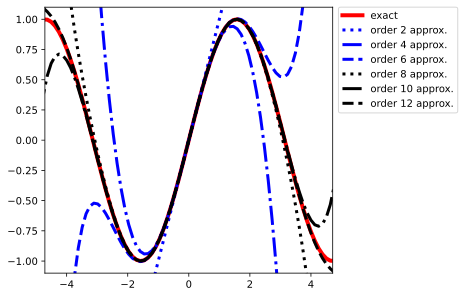

In [ ]:
# a symbolic variable for x,
# and a numerical array with specific values of x
sym_x = sympy.Symbol("x")
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)

def sin_expansion(x, n):
    """
    Evaluate the nth order Taylor series expansion
    of sin(x) for the numerical values in the array x.
    """
    return sympy.lambdify(sym_x,
                           sympy.sin(sym_x).series(n=n+1).removeO(),
                           'numpy')(x)

fig, ax = plt.subplots()

ax.plot(x, np.sin(x), linewidth=4, color="red", label='exact')

colors = ["blue", "black"]
linestyles = [':', '-.', '--']
for idx, n in enumerate(range(1, 12, 2)):
    ax.plot(x, sin_expansion(x, n), color=colors[idx // 3],
            linestyle=linestyles[idx % 3], linewidth=3,
            label="order %d approx." % (n+1))

ax.set_ylim(-1.1, 1.1)
ax.set_xlim(-1.5*np.pi, 1.5*np.pi)

# place a legend outsize of the Axes
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
# make room for the legend to the right of the Axes
fig.subplots_adjust(right=.75)

***
### Legends
a legend may be added to an Axes instance in a Matplotlib figure. Only lines with assigned labels are included in the legend (to assign a label to a line, use the label argument of, for example, `Axes.plot`). 

The legend method accepts a large number of optional arguments. See `help(plt.legend)` for details. The example in the previous section used the loc argument, which allows specifying where in the Axes area the legend is to be added: `loc=1` for upper-right corner, `loc=2` for upper-left corner, `loc=3` for the lower-left corner, and loc=4 for the lower-right corner

#### **Legend at different positions within an Axes instance specified using the loc argument of the legend method**

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9798868804137/files/images/332789_3_En_4_Chapter/332789_3_En_4_Fig9_HTML.png)

**The `bbox_to_anchor` argument takes the value of a tuple on the form `(x, y)`, where `x` and `y` are the canvas coordinates within the Axes object. The point `(0, 0)` corresponds to the `lower-left` corner, and `(1, 1)` corresponds to the `upper-right` corner.** 

>**`Note`**
>
>**that `x` and `y` can be smaller than `0` and larger than `1` in this case, which indicates that the legend is tobe placed outside the Axes area**

**By default, all lines in the legend are shown in a vertical arrangement. Using the `ncols` argument, it is possible to split the legend labels into multiple columns**

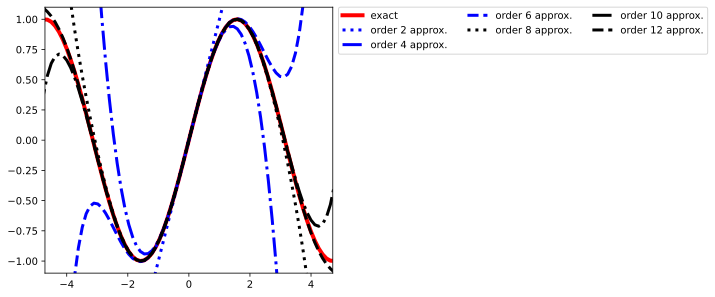

In [ ]:
# a symbolic variable for x,
# and a numerical array with specific values of x
sym_x = sympy.Symbol("x")
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)

def sin_expansion(x, n):
    """
    Evaluate the nth order Taylor series expansion
    of sin(x) for the numerical values in the array x.
    """
    return sympy.lambdify(sym_x,
                           sympy.sin(sym_x).series(n=n+1).removeO(),
                           'numpy')(x)

fig, ax = plt.subplots()

ax.plot(x, np.sin(x), linewidth=4, color="red", label='exact')

colors = ["blue", "black"]
linestyles = [':', '-.', '--']
for idx, n in enumerate(range(1, 12, 2)):
    ax.plot(x, sin_expansion(x, n), color=colors[idx // 3],
            linestyle=linestyles[idx % 3], linewidth=3,
            label="order %d approx." % (n+1))

ax.set_ylim(-1.1, 1.1)
ax.set_xlim(-1.5*np.pi, 1.5*np.pi)

# place a legend outsize of the Axes
# ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0, ncols=3) # By default, all lines in the legend are shown in a vertical arrangement. Using the `ncols` argument, it is possible to split the legend labels into multiple columns

# make room for the legend to the right of the Axes
fig.subplots_adjust(right=.75)

![legends-ncols](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9798868804137/files/images/332789_3_En_4_Chapter/332789_3_En_4_Fig10_HTML.png)

In [32]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs) -> 'Legend'
    Place a legend on the Axes.

    Call signatures::

        legend()
        legend(handles, labels)
        legend(handles=handles)
        legend(labels)

    The call signatures correspond to the following different ways to use
    this method:

    **1. Automatic detection of elements to be shown in the legend**

    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.

    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::

        ax.plot([1, 2, 3], label='Inline label')
        ax.legend()

    or::

        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()

    .. note::
        Specific artists can be excluded from the automatic legend element
        selectio

In [33]:
print(mpl.rcParams)

_internal.classic_mode: False
agg.path.chunksize: 0
animation.bitrate: -1
animation.codec: h264
animation.convert_args: ['-layers', 'OptimizePlus']
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: black
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: black
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes.spines.bottom: True
axes.spines.left: True
axes.spines

***
## **Text Formatting and Annotations**
The default values can, for instance, be set in the Matplotlib resource file, and session-wide configuration can be set in the `mpl.rcParams` dictionary. This dictionary is a cache of the Matplotlib resource file

In scientific and technical visualization, it is important to be able to render mathematical symbols and expressions in text labels. Matplotlib provides excellent support for this through LaTeX markup within its text labels: any text label in Matplotlib can include LaTeX math expressions by enclosing it within $ signs, for example, "Regular text: $f(x)=1-x^2$". By default, Matplotlib uses an internal LaTeX rendering, which supports a subset of the LaTeX language. However, by setting the configuration parameter mpl.rcParams["text.usetex"]=True, it is also possible to use an external full-featured LaTeX engine (if it is available on your system).

When embedding LaTeX code in strings in Python, there is a common stumbling block: Python uses \ as the escape character, whereas in LaTeX, it is used to denote the start of commands. To prevent the Python interpreter from escaping characters in strings containing LaTeX expressions, it is convenient to use raw strings, which are literal string expressions that are prepended with an r, for example, r"$\int f(x) dx$" and r'$x_{\rm A}$'.

#### The following example demonstrates **<u>how to add text labels and annotations to a Matplotlib figure using</u>** `ax.text` and `ax.annotate` and **<u>how to render a text label that includes an equation typeset </u> in `LaTeX`**

Text(2, 0.1, 'Equation: $i\\hbar\\partial_t \\Psi = \\hat{H}\\Psi$')

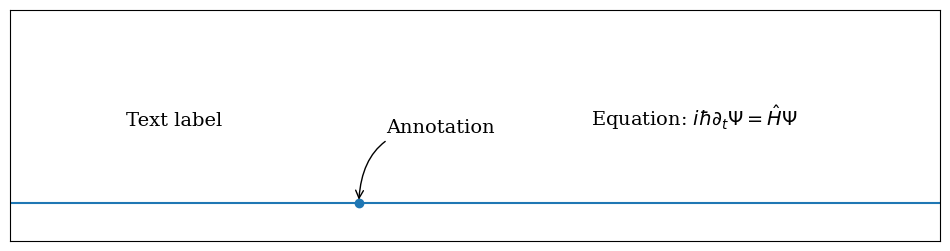

In [7]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.set_yticks([])       # hide y ticks
ax.set_xticks([])       # hide x ticks
ax.set_xlim(-0.5, 3.5)  # x limits takes two arguments: (xmin, xmax)
ax.set_ylim(-0.05, 0.25) # y limits takes two arguments: (ymin, ymax)
ax.axhline(0)           # draw a horizontal line at y=0

# text label
ax.text(0, 0.1, "Text label", fontsize=14, family="serif") # Add the text s to the Axes at location x, y in data coordinates

# annotation
ax.plot(1, 0, "o")          # plot x and y using circle markers
ax.annotate("Annotation",
            fontsize=14, family="serif",
            xy=(1, 0), xycoords="data",
            xytext=(+20, +50), textcoords="offset points",
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=.5"))

# equation
ax.text(2, 0.1, r"Equation: $i\hbar\partial_t \Psi = \hat{H}\Psi$",
           fontsize=14, family="serif")

#### Above Example demonstrating the result of adding text labels and annotations using `ax.text` and `ax.annotation` and including `LaTeX` formatted equations in a Matplotlib text label

***
### Axis Properties
A two-dimensional graph has two axis objects: the horizontal x axis and the vertical y axis. Each axis can be individually configured with respect to attributes such as the axis labels, the placement of ticks and the tick labels, and the location and appearance of the axis itself

### Axis Labels and Titles
* The axis label is the most important property of an axis. We set the axis labels using the `set_xlabel` and `set_ylabel` methods: they both take a string with the label as the first argument. 
* In addition, the optional `labelpad` argument specifies the spacing from the axis to the label in units of points. This padding is occasionally necessary to avoid overlap between the axis label and the axis tick labels. 
* The `set_xlabel` and `set_ylabel` methods also take additional arguments for setting text properties, such as color, fontsize, and fontname. 

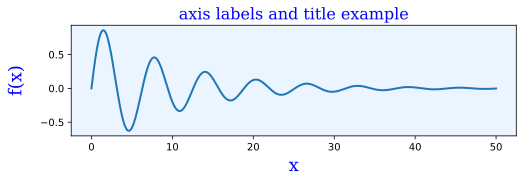

Signature: ax.set_xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
Source:   
    def set_xlabel(self, xlabel, fontdict=None, labelpad=None, *,
                   loc=None, **kwargs):
        """
        Set the label for the x-axis.

        Parameters
        ----------
        xlabel : str
            The label text.

        labelpad : float, default: :rc:`axes.labelpad`
            Spacing in points from the Axes bounding box including ticks
            and tick labels.  If None, the previous value is left as is.

        loc : {'left', 'center', 'right'}, default: :rc:`xaxis.labellocation`
            The label position. This is a high-level alternative for passing
            parameters *x* and *horizontalalignment*.

        Other Parameters
        ----------------
        **kwargs : `~matplotlib.text.Text` properties
            `.Text` properties control the appearance of the label.

        See Also
        --------
        text : Documents the properties

In [45]:
x = np.linspace(0,50,500)
y = np.sin(x) * np.exp(-x/10)

fig, ax = plt.subplots(figsize=(8, 2),
                       subplot_kw={'facecolor': "#ebf5ff"})
ax.plot(x, y, lw=2)
ax.set_xlabel("x", labelpad=5, fontsize=18, fontname='serif',
              color="blue")
ax.set_ylabel("f(x)", labelpad=15, fontsize=18, fontname='serif',
              color="blue")
ax.set_title("axis labels and title example", fontsize=16,
             fontname='serif', color="blue")

ax.set_xlabel??

In [46]:
ax.set_title??

Signature: ax.set_title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)
Source:   
    def set_title(self, label, fontdict=None, loc=None, pad=None, *, y=None,
                  **kwargs):
        """
        Set a title for the Axes.

        Set one of the three available Axes titles. The available titles
        are positioned above the Axes in the center, flush with the left
        edge, and flush with the right edge.

        Parameters
        ----------
        label : str
            Text to use for the title

        fontdict : dict

            .. admonition:: Discouraged

               The use of *fontdict* is discouraged. Parameters should be passed as
               individual keyword arguments or using dictionary-unpacking
               ``set_title(..., **fontdict)``.

            A dictionary controlling the appearance of the title text,
            the default *fontdict* is::

               {'fontsize': rcParams['axes.titlesize'],
                'fon

### Axis Range
By default, the range of the x and y axes of a Matplotlib is automatically adjusted to the data plotted in the `Axes` object. In many cases, these default ranges are sufficient, but in some situations, explicitly setting the axis ranges may be necessary. In such cases, we can use the `set_xlim` and `set_ylim` methods of the Axes object. These methods take two arguments that specify the lower and upper limit to be displayed on the axis, respectively. An alternative to `set_xlim` and `set_ylim` is the axis method, which, for example, accepts the string argument `'tight'`, for a coordinate range that tightly fits the lines it contains and `'equal'` for a coordinate range where one unit length along each axis corresponds to the same number of pixels (i.e., a ratio preserving coordinate system).

It is also possible to use the autoscale method to selectively turn on and off autoscaling by passing `True` and `False` as the first argument for the x and/or y-axis by setting its axis argument to 'x', 'y', or 'both'. The following example shows how to use these methods to control axis ranges. The resulting graphs are shown in Figure

Text(0.5, 1.0, "axis('equal')")

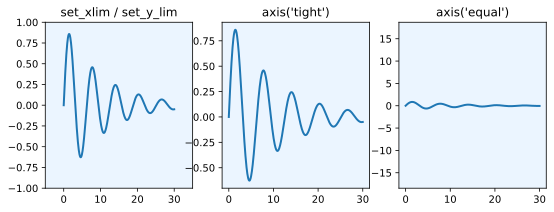

In [47]:
x = np.linspace(0, 30, 500)
y = np.sin(x) * np.exp(-x/10)


fig, axes = plt.subplots(1, 3, figsize=(9, 3),
                         subplot_kw={'facecolor': "#ebf5ff"})

axes[0].plot(x, y, lw=2)
axes[0].set_xlim(-5, 35)
axes[0].set_ylim(-1, 1)
axes[0].set_title("set_xlim / set_y_lim")

axes[1].plot(x, y, lw=2)
axes[1].axis('tight')
axes[1].set_title("axis('tight')")

axes[2].plot(x, y, lw=2)
axes[2].axis('equal')
axes[2].set_title("axis('equal')")

### Axis Ticks, Tick Labels, and Grids
The final basic properties of the axis that remain to be specified are the placement of axis ticks and the placement and formatting of the corresponding tick labels. The axis ticks are an important part of the overall appearance of a graph. When preparing publication and production-quality graphs, detailed control over the axis ticks is often necessary. Matplotlib module `mpl.ticker` provides a general and extensible tick management system that gives full control of the tick placement. Matplotlib distinguishes between major ticks and minor ticks. By default, every major tick has a corresponding label, and the distances between major ticks may be further marked with minor ticks that do not have labels, although this feature must be explicitly turned on. 

![](axis-ticks.png)

When configuring graph ticks, a common design requirement is determining where the major ticks with labels should be placed along the coordinate axis. The mpl.ticker module provides classes for different tick placement strategies. For example, the `mpl.ticker.MaxNLocator` can set the maximum number of ticks (at unspecified locations), the `mpl.ticker.MultipleLocator` can be used for setting ticks at multiples of a given base, and the `mpl.ticker.FixedLocator` can be used to place ticks at explicitly specified coordinates. To change the ticker strategy, use the `set_major_locator` and the `set_minor_locator` methods in `Axes.xaxis` and `Axes.yaxis`. These methods accept an instance of a ticker class defined in mpl.ticker or a custom class that is derived from one of those classes.

When explicitly specifying tick locations, we can also use the `set_xticks` and `set_yticks` methods, which accept a list of coordinates for where to place major ticks. In this case, it is also possible to set custom labels for each tick using the `set_xticklabels` and `set_yticklabels` methods, which expect lists of strings to be used as labels for the corresponding ticks. It is a good idea to use generic tick placement strategies, for example, `mpl.ticker.MaxNLocator`, because they dynamically adjust if the coordinate range is changed, whereas explicit tick placement using set_xticks and set_yticks then would require manual code updates. However, when the exact placement of ticks must be controlled, then `set_xticks` and `set_yticks` are convenient methods.

The following code demonstrates how to change the default tick placement using combinations of the methods discussed in this section

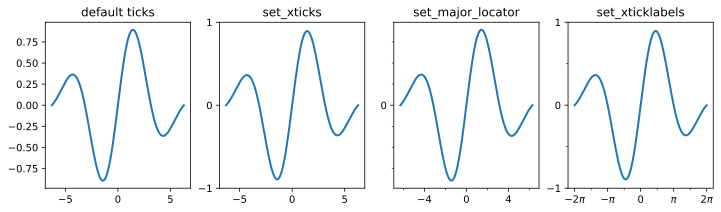

In [48]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
y = np.sin(x) * np.exp(-x**2/20)

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

axes[0].plot(x, y, lw=2)
axes[0].set_title("default ticks")
axes[1].plot(x, y, lw=2)
axes[1].set_title("set_xticks")
axes[1].set_yticks([-1, 0, 1])
axes[1].set_xticks([-5, 0, 5])

axes[2].plot(x, y, lw=2)
axes[2].set_title("set_major_locator")
axes[2].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[2].xaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))
axes[2].yaxis.set_major_locator(mpl.ticker.FixedLocator([-1, 0, 1]))
axes[2].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))

axes[3].plot(x, y, lw=2)
axes[3].set_title("set_xticklabels")
axes[3].set_yticks([-1, 0, 1])
axes[3].set_xticks([-2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi])
axes[3].set_xticklabels([r'$-2\pi$', r'$-\pi$', 0, r'$\pi$', r'$2\pi$'])
x_minor_ticker = mpl.ticker.FixedLocator(
    [-3 * np.pi / 2, -np.pi / 2, 0, np.pi / 2, 3 * np.pi / 2])
axes[3].xaxis.set_minor_locator(x_minor_ticker)
axes[3].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(4))

* A commonly used design element in graphs is grid lines, which are intended as a visual guide when reading values from the graph. Grids and grid lines are closely related to axis ticks since they are drawn at the same coordinate values and are essentially extensions of the ticks that span across the graph. In Matplotlib, we can turn on axis grids using the grid method of an axes object. 

* The grid method takes optional keyword arguments used to control the grid’s appearance. For example, like many of the plot functions in Matplotlib, the grid method accepts the `color`, `linestyle`, and `linewidth` arguments for specifying the properties of the grid lines. In addition, it takes the which and `axis` arguments, which can be assigned values `'major'`, `'minor'`, or `'both'`, and `'x'`, `'y'`, or `'both'`, respectively. These arguments indicate which ticks the given style is to be applied along an axis. If several different styles for the grid lines are required, multiple calls to `grid` can be used, with different values of `which` and `axis`. For an example of how to add grid lines and style them in different ways, see the following code listing, which produces the graphs shown below

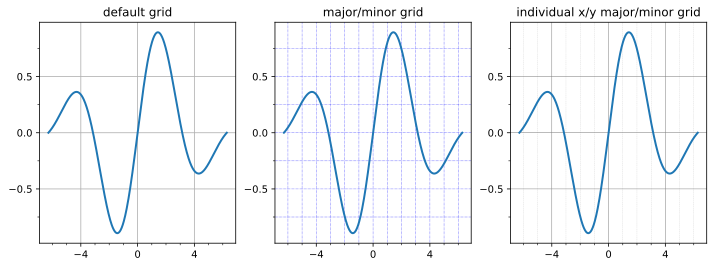

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
x_major_ticker = mpl.ticker.MultipleLocator(4)
x_minor_ticker = mpl.ticker.MultipleLocator(1)
y_major_ticker = mpl.ticker.MultipleLocator(0.5)
y_minor_ticker = mpl.ticker.MultipleLocator(0.25)

for ax in axes:
    ax.plot(x, y, lw=2)
    ax.xaxis.set_major_locator(x_major_ticker)
    ax.yaxis.set_major_locator(y_major_ticker)
    ax.xaxis.set_minor_locator(x_minor_ticker)
    ax.yaxis.set_minor_locator(y_minor_ticker)

axes[0].set_title("default grid")
axes[0].grid()

axes[1].set_title("major/minor grid")
axes[1].grid(color="blue", which="both", linestyle=':', linewidth=0.5)

axes[2].set_title("individual x/y major/minor grid")
axes[2].grid(color="grey", which="major", axis='x',
             linestyle='-', linewidth=0.5)
axes[2].grid(color="grey", which="minor", axis='x',
             linestyle=':', linewidth=0.25)
axes[2].grid(color="grey", which="major", axis='y',
             linestyle='-', linewidth=0.5)

In addition to controlling the tick placements, the Matplotlib mpl.ticker module also provides classes for customizing the tick labels. For example, the `ScalarFormatter` from the `mpl.ticker` module can be used to set several useful properties related to displaying tick labels with scientific notation, for displaying axis labels for large numerical values. If scientific notation is activated using the `set_scientific` method, we can control the threshold for when scientific notation is used with the `set_powerlimits` method (by default, tick labels for small numbers are not displayed using the scientific notation). We can use the `useMathText=True` argument when creating the `ScalarFormatter` instance to have the exponents shown in math style rather than code style exponents (e.g., 1e10). The `formatter` object is applied to an Axes object using the `set_major_formatter` method. See the following code for an example of using scientific notation in tick labels. 

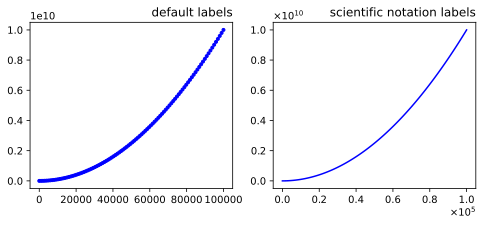

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

x = np.linspace(0, 1e5, 100)
y = x ** 2

axes[0].plot(x, y, 'b.')
axes[0].set_title("default labels", loc='right')

axes[1].plot(x, y, 'b')
axes[1].set_title("scientific notation labels", loc='right')

formatter = mpl.ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))
axes[1].xaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)